In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Python'da uyarilari kapatalim
import warnings
warnings.filterwarnings("ignore")


In [2]:
#veriyi iceri aktaralim
veri = pd.read_csv("athlete_events.csv")
veri.head()

FileNotFoundError: [Errno 2] No such file or directory: 'athlete_events.csv'

In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
#sutün isimlerini degistirelim
veri.rename(columns={
    'ID':'id',
    'Name':'isim',
    'Sex':'cinsiyet',
    'Age':'yas',
    'Height':'boy',
    'Weight':'kilo',
    'Team':'takim',
    'NOC':'uok',
    'Games':'oyunlar',
    'Year':'yil',
    'Season':'sezon',
    'City':'sehir',
    'Sport':'spor',
    'Event':'etkinlik',
    'Medal':'madalya',
}, inplace=True)
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
# drop fonksiyonu ile id ve oyunlar sütunlarini cikaralim
veri=veri.drop(["id","oyunlar"],axis=1)#axis=1 sütun manasinda
veri.head(8)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
#boy ve kilo sütununda bulunan kayip verileri etkinli ortalamasina göre dolduracagiz
essiz_etkinlik=pd.unique(veri.etkinlik)
print("essiz etkinlik sayisi:{}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

essiz etkinlik sayisi:765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [ ]:
#her bir etkinliği iteratif olarak dolas
#ekinlik özelinde boy ve kilo ortalamalarini hesapla
#etkinlik özelinde kayıp boy ve kilo degerlerini etkinlik ortalamalarina esitle
veri_gecici=veri.copy() #gercek veriyi yedekledik
boy_kilo_liste=["boy", "kilo"]
for e in essiz_etkinlik: #liste icerisinde dolas
    #etkinlik filtresi olusturalim
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğte göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    #boy ve kilo icin etkinlik ozelinde ortalamalari hesaplayalim
    for s in boy_kilo_liste:
        ortalama=np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eger ekinlik ozelinde ortalama varsa
            veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
        else: #eger ekinlik ozelinde ortalama yoksa ortalamayi hesapla
            tum_veri_ortalamasi=np.round(np.mean(veri[s]),2)
            veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ortalamasi)
    #etkinlik ozelinde kayip degerleri doldurulmus olan veriyi, veri_gecici'ye atayalim
    veri_gecici[etkinlik_filtre]=veri_filtreli
    
    #kayip degerleri giderilmis olan gecici veriyi gercek veriye ata
veri=veri_gecici.copy()
veri.info() #boy ve kilo sütunlarinda kayip deger sayisinda bakalim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
#kayip veriyi veri setinin yas ortalamasina gore dolduracagiz
yas_ortalamasi=np.round(np.mean(veri.yas),2)
print("yas ortalamasi: {}".format(yas_ortalamasi))
veri["yas"]=veri["yas"].fillna(yas_ortalamasi)
veri.info()

yas ortalamasi: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
#madalya alamayan sporculari veri setinden cikaralim
madalya_degiskeni=veri["madalya"]
pd.isnull(madalya_degiskeni).sum()


231333

In [ ]:
madalya_degiskeni_filtresi=~pd.isnull(madalya_degiskeni)

In [ ]:
veri=veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
#sonradan kullanabilmek icin veriyi kaydedelim
veri.to_csv("athlete-events-filtered-turkish.csv", index=False)

In [ ]:
#sayisal degiskenleri incelemek ve yorumlamak icin veri sikliği ve temel istatistik bilgilerini kullanacagiz
#veri sikliği bilgilerini histogram grafiği sayesinde inceleyeceğiz
#temel istatistik bilgilerini ise kutu grafigi sayesinde yorumlayacagiz
#oncelikli olarak histogram grafiklerini cizdirecegimiz metot(fonksiyon) yazalim
def plotHistogram(degisken):
    """
    Girdi: Degisken/sütun ismi
    Cikti: Ilgili degiskenin histogrami
    """
    plt.figure()
    plt.hist(veri[degisken],bins=85,color ="orange")
    plt.xlabel(degisken)
    plt.ylabel("frekans")
    plt.title("veri sikligi-{}".format(degisken))
    plt.show()

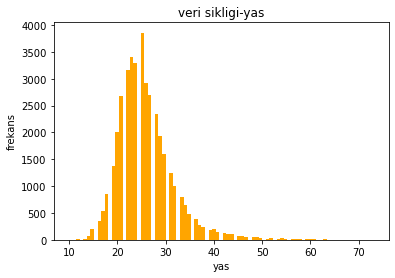

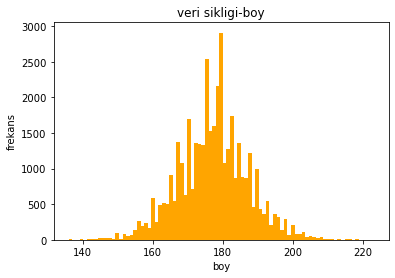

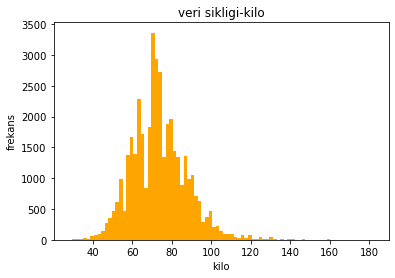

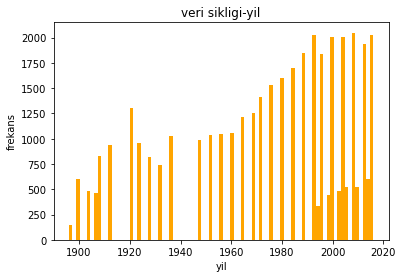

In [ ]:
#tüm sayisal degiskenler icin histogramlari cizdirelim
sayisal_degisken=["yas","boy","kilo","yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [ ]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


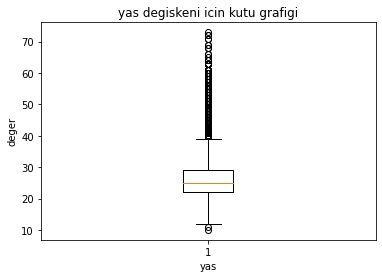

In [ ]:
plt.boxplot(veri.yas)
plt.title("yas degiskeni icin kutu grafigi")
plt.xlabel("yas")
plt.ylabel("deger")
plt.show()

In [ ]:
#oncelikle cubuk grafiklerini cizdirecegimiz metodu yazalim
def plotBar(degisken, n=5):
    """
    Girdi:degisken/sütun ismi
            n=gosterilecek essiz deger sayisi
    Cikti:cubuk grafigi
    """
    veri_=veri[degisken]
    veri_sayma=veri_.value_counts()
    veri_sayma=veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index,veri_sayma,color="orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("frekans")
    plt.title("veri sikliği-{}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))

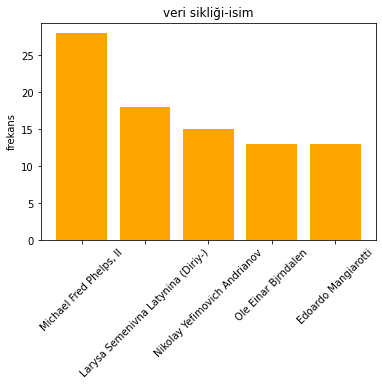

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


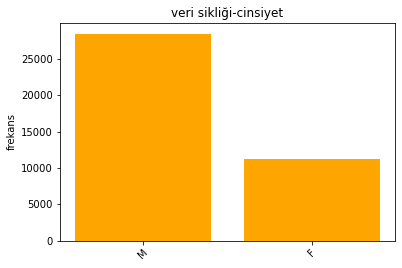

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


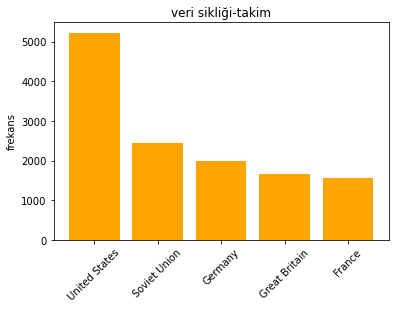

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


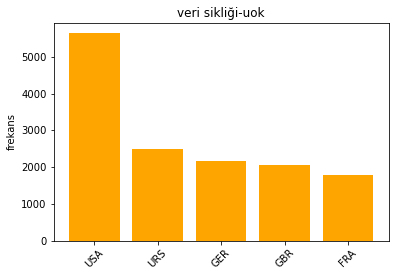

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


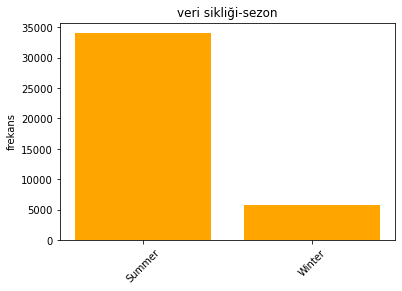

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


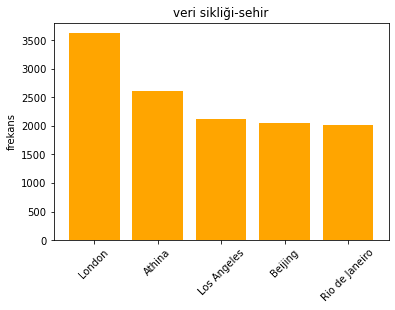

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


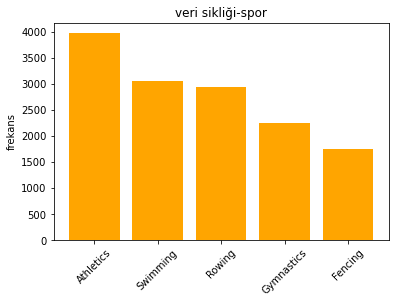

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


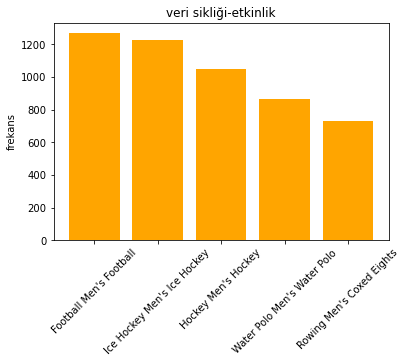

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


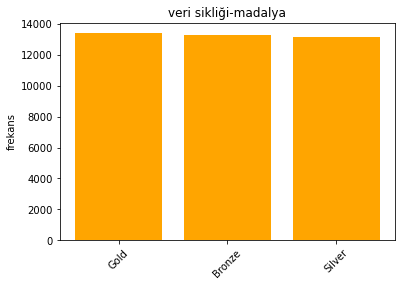

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [ ]:
kategorik_degisken=["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

In [ ]:
erkek=veri[veri.cinsiyet=="M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [ ]:
kadin=veri[veri.cinsiyet=="F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


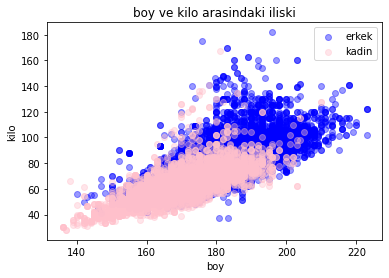

In [ ]:
plt.figure()
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="erkek",color="blue")
plt.scatter(kadin.boy,kadin.kilo,alpha=0.4,label="kadin",color="pink") #alpha degeri transparanligi ayarliyor
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("boy ve kilo arasindaki iliski")
plt.legend()
plt.show()
#bu tablodan boy ve agirlik arasinda pozitif bir iliski oldugunu anliyoruz

In [ ]:
veri.loc[:,["yas","boy","kilo"]].corr() #korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [ ]:
#madalya ve yas arasindaki iliskiyi inceleyelim
#sporcularimizi altin, gumus ve bronz madalyaya gore ayiralim
veri_gecici=veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=["madalya"])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [ ]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()
#yas ve madalya turu arasinda bir iliski bulunamadi

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [ ]:
#takim bazinda madalya turu iliskisi
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [ ]:
#sehir bazinda madalya turu iliskisi
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [ ]:
#cinsiyet bazinda madalya turu iliskisi
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Cok degiskenli veri analizi
## pivot tablosu
### pivot tablo, veritabani, is zekasi programi ya da veri tablosu gibi, daha genis bir tabloyu ozetleyen istatistik tablosudur. Bu ozet , pivot tabloyu anlamli bir sekilde gruplayan toplamlari, ortalamalari veya diger istatistikleri icerebilir.


In [ ]:
veri_pivot=veri.pivot_table(index="madalya",columns="cinsiyet",
                           values=["boy","kilo","yas"],
                            aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

# anamoli tespiti
## aykiri deger, diger gozlemlerden onemli olcude farkli bir veri noktasidir. bir aykiri deger, olcumdeki degiskenlige bagli olabilir veya deneysel hatayi gosterebilir; ikincisi bazen veri kumesinden cıkarilir. bir aykiri deger istatistiksel analizlerde ciddi sorunlara neden olabilir.

In [ ]:
def anomaliTespiti(df,ozellik):
    outlier_indices=[]
    
    for c in ozellik:
        #1. ceyrek
        Q1=np.percentile(df[c],25)
        #3. ceyrek
        Q3=np.percentile(df[c],75)
        #IQR:inter quartile range
        IQR=Q3-Q1
        #aykiri deger icin eke adim miktari
        outlier_step=1.5*IQR
        #aykiri degeri ve bulundugu indeksi tespit edelim
        outlier_list_col= df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        #tespit edilen indeksleri depolayalim
        outlier_indices.extend(outlier_list_col)
        
    #essiz aykiri degerleri bulalim
    outlier_indices=Counter(outlier_indices)
    #eger bir ornek v adet sutunda farkli deger ise bunu aykiri kabul edelim
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>1)
    
    return multiple_outliers

In [ ]:
veri_anomali=veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

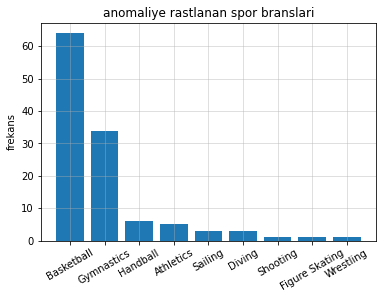

In [ ]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("anomaliye rastlanan spor branslari")
plt.ylabel("frekans")
plt.grid(True, alpha=0.5)
plt.show()

In [ ]:
veri_gym=veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


+ jimnastikte meydana gelen anomali sonucunda veriyi inceledigimizde anomalinin nedeni sporcularin yaslarinin kucuk ve kilolarinin az olmasindan kaynaklidir

In [ ]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

In [ ]:
veri_basketbol=veri_anomali[veri_anomali.spor=="Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [ ]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

+ Basketbol oynayan erkek oyuncularin boylarinin uzun ve kilolarinin fazla olmasindan kaynakli anomali tespit edilmistir

# zaman serilerinde veri analizi
+ yillara göre ortalama yas, boy, kilo degisimi
+ yillara gore madalya sayilari

In [ ]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [ ]:
essiz_yillar=veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [ ]:
#olimpiyatlarin yapildigi yillari siralayalim
dizili_array=np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

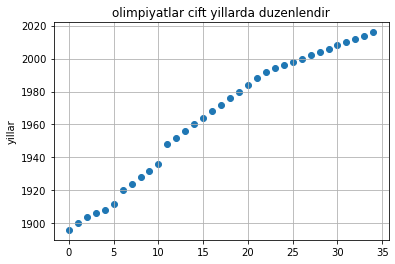

In [ ]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("yillar")
plt.title("olimpiyatlar cift yillarda duzenlendir")
plt.show()

In [ ]:
#veri icerisinde bulunan yil degerlerini datetime veri tipine donusturelim
tarih_saat_nesnesi=pd.to_datetime(veri_zaman["yil"], format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [ ]:
veri_zaman["tarih_saat"]=tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [ ]:
#veri_zaman degiskeninin ana indeksini, datetime tipi olan tarih_saat degerine guncelleyelim
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace=True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


# yillara gore ortalama yas, boy ve kilo degisimi

In [ ]:
periyodik_veri=veri_zaman.resample("2A").mean() #2 yillik periyotlar halinde ortalama degerleri aliyor
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [ ]:
#kayip verileri cikaralim
periyodik_veri.dropna(axis=0,inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

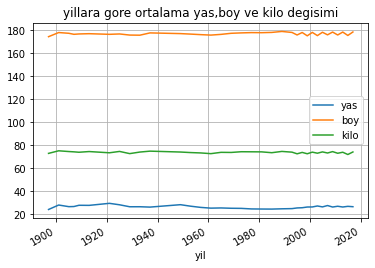

In [ ]:
plt.figure()
periyodik_veri.plot()
plt.title("yillara gore ortalama yas,boy ve kilo degisimi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

# yillara gore madalya sayilari

In [ ]:
veri_zaman=pd.get_dummies(veri_zaman,columns=['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [ ]:
periyodik_veri=veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayip verileri cikaralim
periyodik_veri=periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

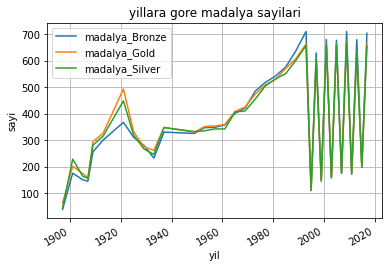

In [ ]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("yillara gore madalya sayilari")
plt.ylabel("sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

# yillara ve sezonlara gore madalya sayilari

In [ ]:
yaz=veri_zaman[veri_zaman.sezon=="Summer"]
kis=veri_zaman[veri_zaman.sezon=="Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [ ]:
periyodik_veri_kis=kis.resample("A").sum()
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis==0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [ ]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

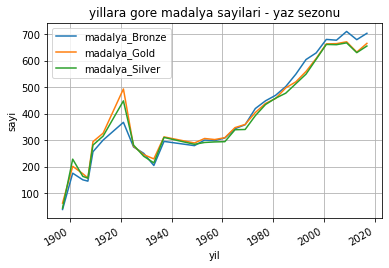

In [ ]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("yillara gore madalya sayilari - yaz sezonu")
plt.ylabel("sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

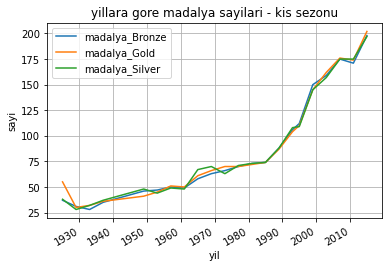

In [ ]:
plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("yillara gore madalya sayilari - kis sezonu")
plt.ylabel("sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()